:# Demand Forecasting + Safety Stock + ROP + EOQ

---



## **Demand Forcasting**

In [ ]:
from google.colab import files 
uploaded = files.upload()


Saving daily_demand_data.xlsx to daily_demand_data (1).xlsx


In [1]:
import warnings
import itertools
from math import *
import numpy as np
import pandas as pd
from scipy.stats import *
import statsmodels.api as sm
import matplotlib.pylab as plt
%matplotlib inline
plt.style.use('seaborn-colorblind')
from datetime import datetime

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
demand_df = pd.read_excel('daily_demand_data.xlsx')
demand_df['Date'] = pd.to_datetime(demand_df['Date'], format='%d%m%Y')
demand_df.set_index('Date', inplace=True)

In [ ]:
demand_df.head(10)

,Daily_Demand_of_Parts
Date,
2018-01-01,7
2018-01-02,9
2018-01-03,9
2018-01-04,5
2018-01-05,8
2018-01-06,5
2018-01-07,4
2018-01-08,6
2018-01-09,5


In [ ]:
# Resample the demand data in monthly interval
demand_ts = demand_df['Daily_Demand_of_Parts'].resample('MS').mean()
demand_ts.head(10)

Date
2018-01-01    6.741935
2018-02-01    6.642857
2018-03-01    7.419355
2018-04-01    6.500000
2018-05-01    7.096774
2018-06-01    6.066667
2018-07-01    6.774194
2018-08-01    6.580645
2018-09-01    7.166667
2018-10-01    7.032258
Freq: MS, Name: Daily_Demand_of_Parts, dtype: float64

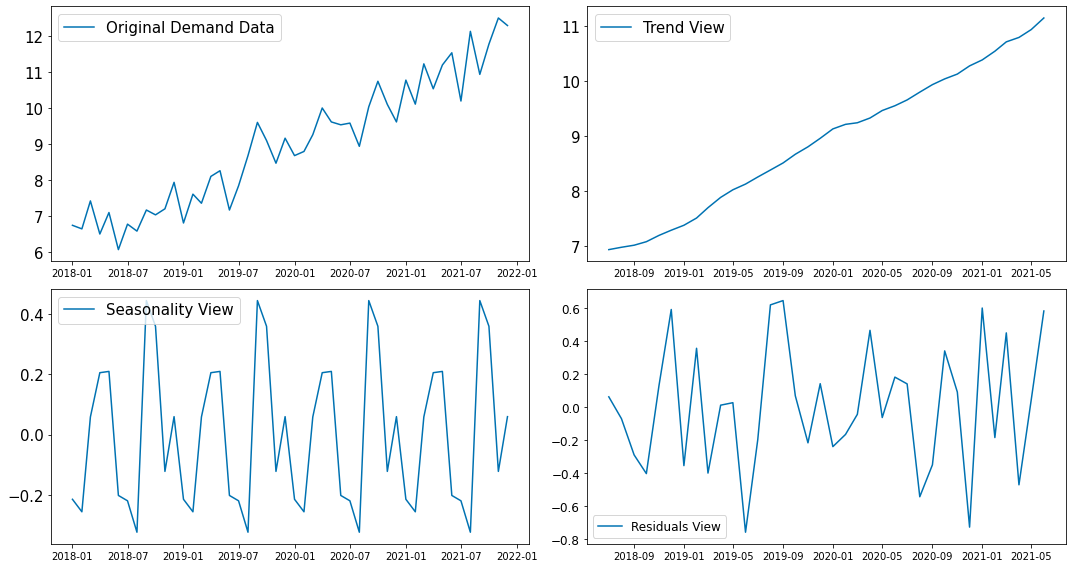

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(demand_ts)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(15, 8))

plt.subplot(2,2,1)
plt.plot(demand_ts, label='Original Demand Data')
plt.legend(loc='best', fontsize = 15)
plt.tick_params(axis='y', which='major', labelsize=15)

plt.subplot(2,2,2)
plt.plot(trend, label='Trend View')
plt.legend(loc='best', fontsize = 15)
plt.tick_params(axis='y', which='major', labelsize=15)

plt.subplot(2,2,3)
plt.plot(seasonal, label='Seasonality View')
plt.legend(loc='best', fontsize = 15)
plt.tick_params(axis='y', which='major', labelsize=15)

plt.subplot(2,2,4)
plt.plot(residual, label='Residuals View')
plt.legend(loc='best', fontsize = 12)
plt.tick_params(axis='y', which='major', labelsize=12)
plt.tight_layout()

In [ ]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
m = 12
seasonal_pdq = [(x[0], x[1], x[2], m) for x in list(itertools.product(p, d, q))]


In [ ]:
# specify to ignore warning messages
warnings.filterwarnings("ignore") 

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(demand_ts,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{};  AIC:{:.4f}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12);  AIC:343.9830
ARIMA(0, 0, 0)x(0, 0, 1, 12);  AIC:1749.2161
ARIMA(0, 0, 0)x(0, 1, 0, 12);  AIC:136.4478
ARIMA(0, 0, 0)x(1, 0, 0, 12);  AIC:88.5373
ARIMA(0, 0, 0)x(1, 0, 1, 12);  AIC:82.3173
ARIMA(0, 0, 0)x(1, 1, 0, 12);  AIC:80.6137
ARIMA(0, 0, 1)x(0, 0, 0, 12);  AIC:281.8774
ARIMA(0, 0, 1)x(0, 0, 1, 12);  AIC:1448.6730
ARIMA(0, 0, 1)x(0, 1, 0, 12);  AIC:118.6806
ARIMA(0, 0, 1)x(1, 0, 0, 12);  AIC:90.4716
ARIMA(0, 0, 1)x(1, 0, 1, 12);  AIC:80.6125
ARIMA(0, 0, 1)x(1, 1, 0, 12);  AIC:81.4410
ARIMA(0, 1, 0)x(0, 0, 0, 12);  AIC:108.8672
ARIMA(0, 1, 0)x(0, 0, 1, 12);  AIC:1298.4196
ARIMA(0, 1, 0)x(0, 1, 0, 12);  AIC:101.4313
ARIMA(0, 1, 0)x(1, 0, 0, 12);  AIC:86.8741
ARIMA(0, 1, 0)x(1, 0, 1, 12);  AIC:1429.1479
ARIMA(0, 1, 0)x(1, 1, 0, 12);  AIC:74.7917
ARIMA(0, 1, 1)x(0, 0, 0, 12);  AIC:93.5137
ARIMA(0, 1, 1)x(0, 0, 1, 12);  AIC:1441.5812
ARIMA(0, 1, 1)x(0, 1, 0, 12);  AIC:82.5307
ARIMA(0, 1, 1)x(1, 0, 0, 12);  AIC:78.8707
ARIMA(0, 1, 1)x(1, 0, 1, 12);  AIC:143

In [ ]:
mod = sm.tsa.statespace.SARIMAX(demand_ts,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3453      0.253     -1.368      0.171      -0.840       0.150
ma.L1         -1.0439      0.593     -1.759      0.079      -2.207       0.119
ar.S.L12      -0.4598      0.179     -2.575      0.010      -0.810      -0.110
sigma2         0.4269      0.497      0.859      0.390      -0.547       1.401


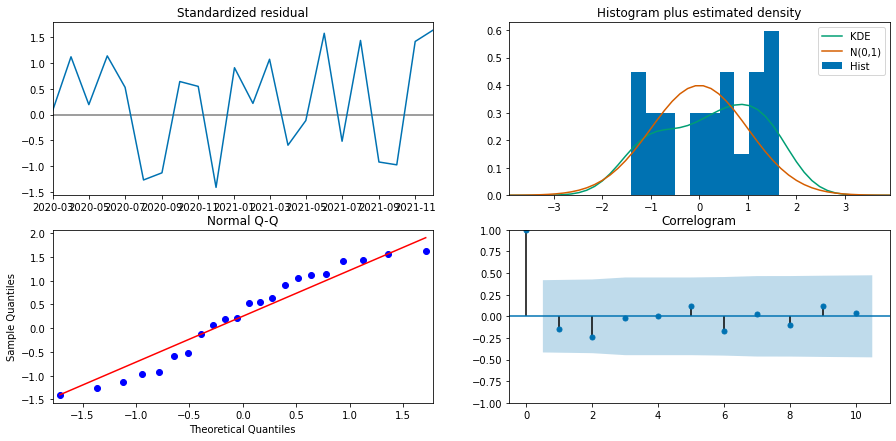

In [ ]:
results.plot_diagnostics(figsize=(15, 7))
plt.show()

In [ ]:
pred = results.get_prediction(start = pd.to_datetime('2021-01-01'), dynamic=False)
pred_ci = pred.conf_int()
pred_ci.head(10)

,lower Daily_Demand_of_Parts,upper Daily_Demand_of_Parts
Date,,
2021-01-01,8.772704,11.510950
2021-02-01,8.591614,11.321859
2021-03-01,9.121468,11.844984
2021-04-01,9.585160,12.302956
2021-05-01,9.917093,12.629983
2021-06-01,9.093726,11.802378
2021-07-01,9.197004,11.901971
2021-08-01,9.791125,12.492869
2021-09-01,10.215309,12.914219


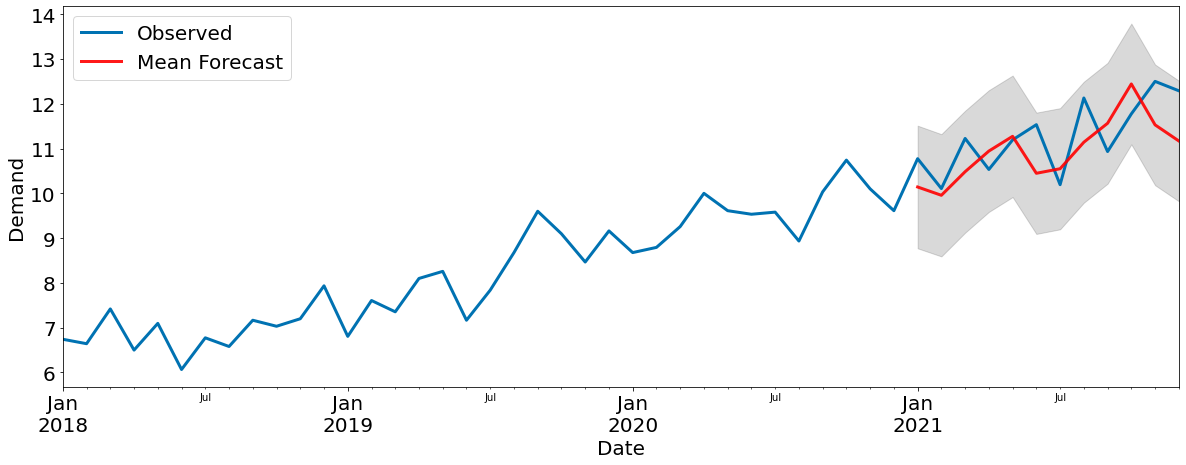

In [ ]:
ax = demand_ts['2018':].plot(label='Observed', linewidth = 3, figsize=(20, 7))
pred.predicted_mean.plot(ax=ax, label='Mean Forecast', linewidth = 3, alpha=0.9, color = 'r')

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=0.15)

ax.set_xlabel('Date', fontsize = 20)
ax.set_ylabel('Demand', fontsize = 20)
plt.legend(loc = 'upper left', fontsize = 20)
ax.tick_params(axis='both', which='major', labelsize=20)
plt.savefig('forecast1.png',  dpi = 300)
plt.show()

In [ ]:
# Get forecast 12 months ahead in future
forcast_uc = results.get_forecast(steps=12)

# Get confidence intervals of forecasts
forcast_ci = forcast_uc.conf_int()
forcast_ci.head(10)

,lower Daily_Demand_of_Parts,upper Daily_Demand_of_Parts
2022-01-01,10.383226,13.073691
2022-02-01,10.354753,13.155556
2022-03-01,11.042511,13.873402
2022-04-01,11.049833,13.879829
2022-05-01,11.213301,14.046197
2022-06-01,11.364632,14.198299
2022-07-01,10.660282,13.495356
2022-08-01,11.409181,14.245431
2022-09-01,11.267217,14.104721
2022-10-01,12.046721,14.885450


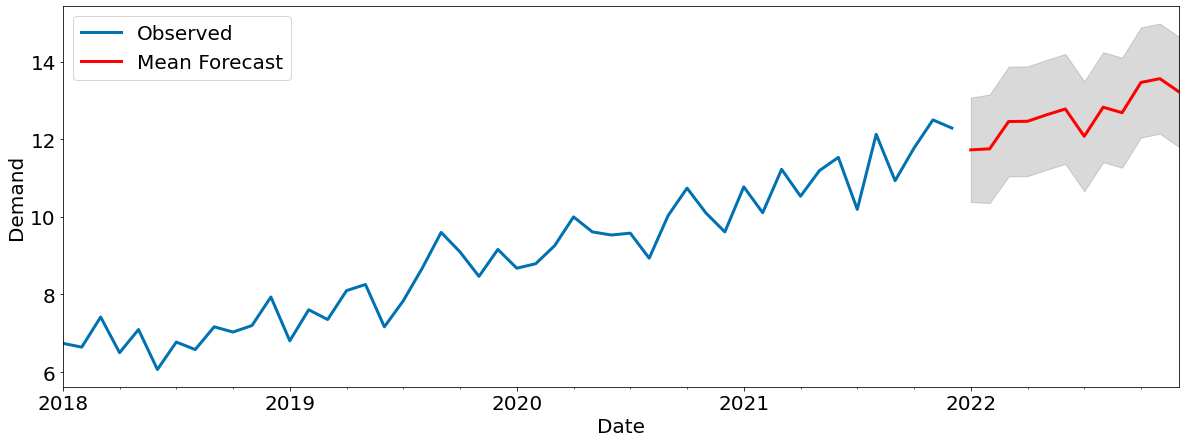

In [ ]:
ax = demand_ts.plot(label='Observed', linewidth = 3, figsize=(20, 7))
forcast_uc.predicted_mean.plot(ax=ax, label='Mean Forecast', linewidth = 3,color = 'r')
ax.fill_between(forcast_ci.index,
                forcast_ci.iloc[:, 0],
                forcast_ci.iloc[:, 1], color='k', alpha=.15)
ax.set_xlabel('Date', fontsize=20)
ax.set_ylabel('Demand', fontsize=20)

ax.tick_params(axis='both', which='major', labelsize=20)
plt.legend(loc = 'upper left', fontsize=20)
plt.savefig('forecast2.png',  dpi = 300)
plt.show()

In [ ]:
demand_forcast = forcast_ci.copy()
demand_forcast['Mean_Daily_Demand']=demand_forcast[['lower Daily_Demand_of_Parts', 'upper Daily_Demand_of_Parts']].mean(axis=1)
demand_forcast['Std_Daily_Demand'] = \
demand_forcast.apply(lambda x: (x['upper Daily_Demand_of_Parts'] - x['lower Daily_Demand_of_Parts'])/4, axis=1)
demand_forcast

,lower Daily_Demand_of_Parts,upper Daily_Demand_of_Parts,Mean_Daily_Demand,Std_Daily_Demand
2022-01-01,10.383226,13.073691,11.728458,0.672616
2022-02-01,10.354753,13.155556,11.755154,0.700201
2022-03-01,11.042511,13.873402,12.457957,0.707723
2022-04-01,11.049833,13.879829,12.464831,0.707499
2022-05-01,11.213301,14.046197,12.629749,0.708224
2022-06-01,11.364632,14.198299,12.781466,0.708417
2022-07-01,10.660282,13.495356,12.077819,0.708769
2022-08-01,11.409181,14.245431,12.827306,0.709063
2022-09-01,11.267217,14.104721,12.685969,0.709376
2022-10-01,12.046721,14.885450,13.466086,0.709682


# **Safety Stock Optimization**


In [ ]:
from google.colab import files 
uploaded = files.upload()

Saving lead_time.csv to lead_time.csv


In [ ]:
# Lead time data from file 
leadtime_df = pd.read_csv("lead_time.csv")
leadtime_list = leadtime_df["lead_time"].tolist()
leadtime_list[:20]

In [ ]:
from statistics import mean, stdev

mu_L = mean(leadtime_list)
sigma_L = stdev(leadtime_list)

print('Mean of lead time = {:.3f}'.format(mu_L))
print('Standard Deviation of lead time = {:.3f}'.format(sigma_L))

In [ ]:
mu_D = demand_forcast['Mean_Daily_Demand'].tolist()
sigma_D = demand_forcast['Std_Daily_Demand'].tolist()

# **Economic Order Quantity (EOQ):**


2022-Jan: EOQ = 53
2022-Feb: EOQ = 53
2022-Mar: EOQ = 55
2022-Apr: EOQ = 55
2022-May: EOQ = 55
2022-Jun: EOQ = 55
2022-Jul: EOQ = 54
2022-Aug: EOQ = 55
2022-Sep: EOQ = 55
2022-Oct: EOQ = 57
2022-Nov: EOQ = 57
2022-Dec: EOQ = 56


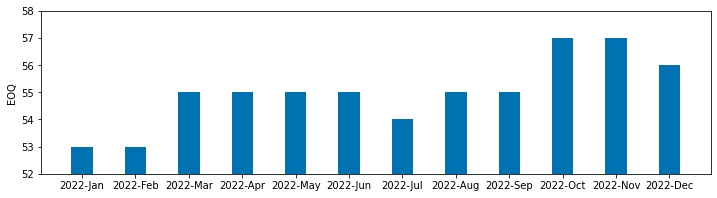

In [ ]:
c0 = 12000 # Fixed ordering cost per order
ch = 100 # Holding cost per unit per unit time

EOQ = []
datelist = pd.date_range(demand_forcast.index[0], demand_forcast.index[-1], \
                         freq='MS').strftime("%Y-%b").tolist()
for i, mean_demand_i in enumerate(mu_D):
    #D_L = mean_demand_i*mu_L
    EOQ.append(round(sqrt(2*mean_demand_i*c0/ch)))
    print("{}: EOQ = {}".format(datelist[i], EOQ[-1]))
    
plt.figure(figsize=(12, 3))
plt.bar(np.arange(len(datelist)), EOQ, width = 0.4)
plt.xticks(np.arange(len(datelist)), datelist)
plt.ylim(52, 58)
plt.ylabel('EOQ')
plt.savefig('EOQ.png',  dpi = 300)

# **Calculation of Reorder point (ROP) and Safety Stock (SS)**

In [ ]:
alpha_list = np.linspace(0.90, 0.99, 10)
print(alpha_list)

[0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97 0.98 0.99]


In [ ]:
SS = [[]]*len(datelist)
ROP = [[]]*len(datelist)
for i, (mean_demand_i, std_demand_i) in enumerate(zip(mu_D, sigma_D)):
    SS_row_i = []
    ROP_row_i = []
    D_L = mean_demand_i*mu_L
    for alpha in alpha_list:
        z_value = norm.ppf(alpha)
        SS_value = z_value*sqrt(mu_L*(std_demand_i**2) + (mean_demand_i**2)*(sigma_L**2))
        SS_row_i.append(round(SS_value))
        
        # Reorder point (ROP) = Expected demand during lead time (D_L) + Safety stock (SS)
        ROP_row_i.append(round(D_L + SS_value))
    
    SS[i] = SS_row_i
    ROP[i] = ROP_row_i

In [ ]:
# Safety stock (SS)
SS_df = pd.DataFrame(SS)
SS_df.columns = [r'$\alpha$ = {:.2f}'.format(x) for x in alpha_list]
SS_df.index = datelist
SS_df

,$\alpha$ = 0.90,$\alpha$ = 0.91,$\alpha$ = 0.92,$\alpha$ = 0.93,$\alpha$ = 0.94,$\alpha$ = 0.95,$\alpha$ = 0.96,$\alpha$ = 0.97,$\alpha$ = 0.98,$\alpha$ = 0.99
2022-Jan,20,21,22,23,24,25,27,29,32,36
2022-Feb,20,21,22,23,24,25,27,29,32,36
2022-Mar,21,22,23,24,25,27,29,31,34,38
2022-Apr,21,22,23,24,25,27,29,31,34,38
2022-May,21,22,23,24,26,27,29,31,34,38
2022-Jun,21,22,24,25,26,28,29,31,34,39
2022-Jul,20,21,22,23,25,26,28,30,32,37
2022-Aug,22,23,24,25,26,28,29,32,34,39
2022-Sep,21,22,23,25,26,27,29,31,34,39
2022-Oct,23,24,25,26,27,29,31,33,36,41


In [ ]:
# Reorder Point (ROP)
ROP_df = pd.DataFrame(ROP)
ROP_df.columns = [r'$\alpha$ = {:.2f}'.format(x) for x in alpha_list]
ROP_df.index = datelist
ROP_df

,$\alpha$ = 0.90,$\alpha$ = 0.91,$\alpha$ = 0.92,$\alpha$ = 0.93,$\alpha$ = 0.94,$\alpha$ = 0.95,$\alpha$ = 0.96,$\alpha$ = 0.97,$\alpha$ = 0.98,$\alpha$ = 0.99
2022-Jan,55,56,57,58,59,61,62,64,67,71
2022-Feb,55,56,57,58,59,61,62,64,67,71
2022-Mar,59,59,61,62,63,64,66,68,71,76
2022-Apr,59,60,61,62,63,64,66,68,71,76
2022-May,59,60,61,63,64,65,67,69,72,77
2022-Jun,60,61,62,63,65,66,68,70,73,78
2022-Jul,57,58,59,60,61,62,64,66,69,73
2022-Aug,60,61,62,64,65,66,68,70,73,78
2022-Sep,60,61,62,63,64,66,67,70,72,77
2022-Oct,63,64,65,67,68,70,72,74,77,82


# **Plotting SS and ROP in a chart**


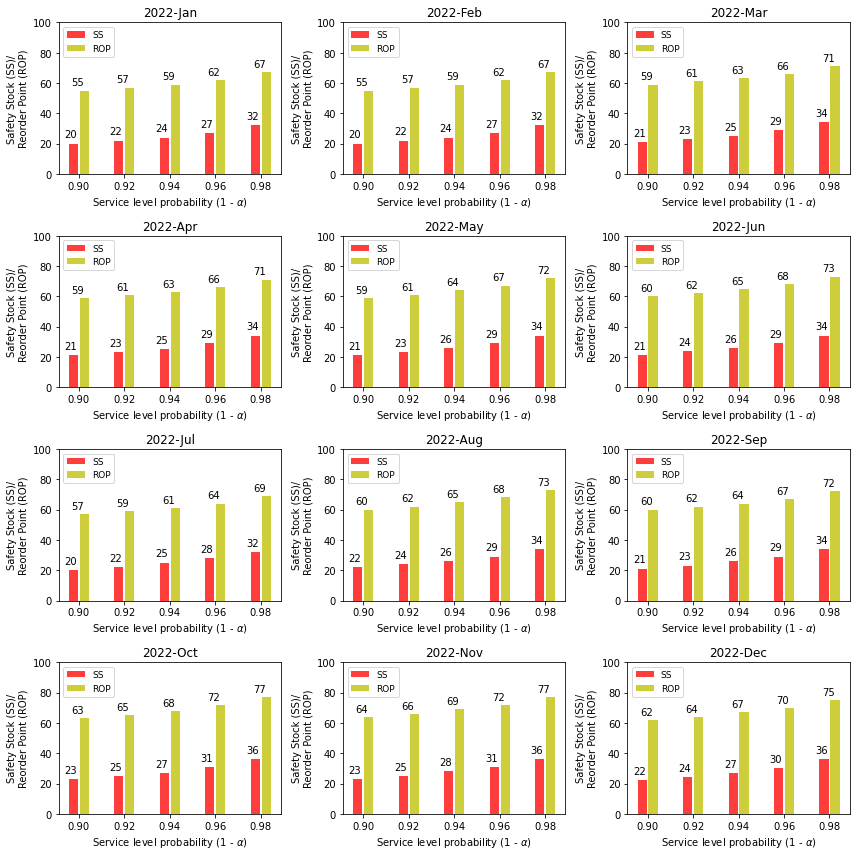

In [ ]:
fig1 = plt.figure(figsize=(12, 12))
#colors = ['b', 'r', 'g', 'm']*len(datelist)
skip = 2
for i in range(len(datelist)):

    SS_monthly_list = SS_df.iloc[i,:].tolist()
    ROP_monthly_list = ROP_df.iloc[i,:].tolist()

    ax = plt.subplot(4,3,i+1)
#     plt.plot(alpha_list, SS_monthly_list, 'bD-', label = 'Safety Stock (SS)', linewidth = 1.5)
#     plt.plot(alpha_list, ROP_monthly_list, 'go-', label = 'Reorder Point (ROP)', linewidth = 1.5)
    
    ax.bar(alpha_list[::skip]-0.0012*skip, SS_monthly_list[::skip], width=0.002*skip, color='R',\
           align='center', label = 'SS', alpha = 0.76)
    ax.bar(alpha_list[::skip]+0.0012*skip, ROP_monthly_list[::skip], width=0.002*skip, color='Y',\
           align='center',label = 'ROP', alpha = 0.76)
    
    for x, y, z in zip(alpha_list[::skip], SS_monthly_list[::skip], ROP_monthly_list[::skip]):
        plt.annotate(y, xy=(x, y), xytext=(-2, 4),\
            textcoords='offset points', ha='right', va='bottom')
        plt.annotate(z, xy=(x, z), xytext=(5, 3),\
            textcoords='offset points', ha='right', va='bottom')

    plt.xlabel('Service level probability (1 - $\\alpha$)', fontsize = 10)
    plt.ylabel('Safety Stock (SS)/'+'\n'+'Reorder Point (ROP)', fontsize = 10)
    plt.ylim(0, 100)
    plt.legend(loc = 'upper left', fontsize = 9)
    ax.set_title(datelist[i])

plt.tight_layout()
plt.show()